## Rat in a Maze

```
You are given a starting position for a rat which is stuck in a maze at an initial point (0, 0) (the maze can be thought of as a 2-dimensional plane). The maze would be given in the form of a square matrix of order 'N' * 'N' where the cells with value 0 represent the maze’s blocked locations while value 1 is the open/available path that the rat can take to reach its destination. The rat's destination is at ('N' - 1, 'N' - 1). Your task is to find all the possible paths that the rat can take to reach from source to destination in the maze. The possible directions that it can take to move in the maze are 'U'(up) i.e. (x, y - 1) , 'D'(down) i.e. (x, y + 1) , 'L' (left) i.e. (x - 1, y), 'R' (right) i.e. (x + 1, y).

Note:
Here, sorted paths mean that the expected output should be in alphabetical order.
For Example:
Given a square matrix of size 4*4 (i.e. here 'N' = 4):
1 0 0 0
1 1 0 0
1 1 0 0
0 1 1 1
Expected Output:
DDRDRR DRDDRR
i.e. Path-1: DDRDRR and Path-2: DRDDRR

The rat can reach the destination at (3, 3) from (0, 0) by two paths, i.e. DRDDRR and DDRDRR when printed in sorted order, we get DDRDRR DRDDRR.
```



```
fn(row, col, visited, path)

Initialize:
  visited -> n*n matrix with all False
  path -> empty string

1 call fn(0, 0, visited, path)
2 Update Visited
3 Down
  3.1 Check if down(row+1, col) is valid
    3.1.1 Is row+1 < n, Is (row+1, col) blocked, Is (row+1)(col+1) visited
    3.1.2 If valid visit
      3.1.2.1 Is (row+1, col) (N-1, N-1)
                If yes add path to route array
                Return
      3.1.2.2 Else Go to 2
    3.1.3 If Invalid return
4 Left
5 Right
6 Up
```



In [ ]:
#stores valid routes from origin to end
routes = []
#stores the maze
arr = [[]]
#number of columns/rows of the square matrix
n = 0

#checks if upcoming cell is valid
def is_valid(row, col, visited):
  #if cell is out of bounds or cell/route is blocked or it has already been visited, it is an invalid cell/route
  if (row > n-1) or (col < 0) or (col > n-1) or (row < 0) or (arr[row][col] == 0) or (visited[row][col] == True):
    return False
  return True

def rat_helper(row, col, visited, path):

  #end reached
  if (row, col) == (n-1, n-1):
    routes.append(path)
    return

  #cell has been visited while in the current route
  visited[row][col] = True

  #Down Path
  #Check if Down is valid
  if is_valid(row+1, col, visited):
    #Go Down
    rat_helper(row+1, col, visited, path + 'D')
    #remove trace while backtracking
    visited[row+1][col] = False

  #Left Path
  #Check if Left is valid
  if is_valid(row, col-1, visited):
    #Go Left
    rat_helper(row, col-1, visited, path + 'L')
    #remove trace while backtracking
    visited[row][col-1] = False

  #Right Path
  #Check if Right is valid
  if is_valid(row, col+1, visited):
    #Go Right
    rat_helper(row, col+1, visited, path + 'R')
    #remove trace while backtracking
    visited[row][col+1] = False

  #Up Path
  #Check if Up is valid
  if is_valid(row-1, col, visited):
    #Go Up
    rat_helper(row-1, col, visited, path + 'U')
    #remove trace while backtracking
    visited[row-1][col] = False


def searchMaze(array, N):
  #empty maze or origin is blocked(=0)
  if N == 0 or array[0][0] == 0:
    return routes

  #passing references to global variables
  global arr, n
  n = N
  arr = array
  # n*n matrix to track visited cells
  visited = [[False] * n for i in range(n)]
  #tracks current path
  path = ""
  #find routes to target, starting from origin(cell (0,0))
  rat_helper(0, 0, visited, path)
  return routes

## Word Search - 1

```
You are given a 2D board('N' rows and 'M' columns) of characters and a string 'word'.



Your task is to return true if the given word exists in the grid, else return false. The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring.



Note:
The same letter cell should not be used more than once.
For Example:
For a given word “design” and the given 2D board
[[q’, ‘v’, ‘m’, ‘h’],
 [‘d’, ‘e’, ‘s’, ‘i’],
 [‘d’, ‘g’, ‘f’, ‘g’],
 [‘e’, ‘c’, ‘p’, ‘n’]]

The word design can be formed by sequentially adjacent cells as shown by the highlighted color in the 2nd row and last column.
```
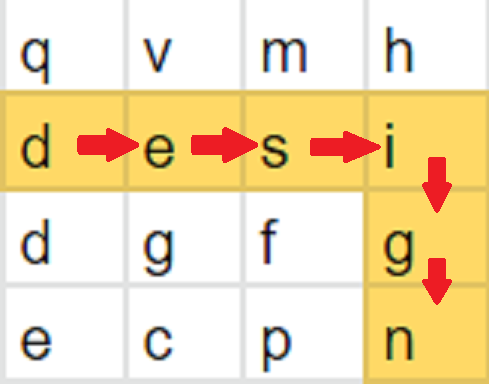
```
Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line contains a string 'word'.

The second line of input contains two single space-separated integers 'N' and 'M' representing the number of rows and columns of the grid respectively.

The next 'N' lines contain 'M' single space-separated characters each representing the elements in a row of the matrix.
Output Format:
The only line contains either “true” or “false”.
Note:
You do not need to print anything, it has already been taken care of. Just implement the function.
```

### Algo

```
class Helper:
  def __init__(self):
    self.found = False
    self.matrix = [[]]
    self.word = ''
    self.k = 0

h = Helper()

def matrix_traversal():
  for i in range (h.n):
    for j in range(h.m):
      if h.matrix[i][j] == word[0]:
        word_search(i, j, 0)
        if h.found == True:
          return True

def word_search(row, col, k):
  if h.found == False:
    if k == len(h.word):
      h.found = True
      return

    #Left, Right, Up, Down
    next_row = [0, 0, -1, 1]
    next_col = [-1, 1, 0, 0]

    for i in range(len(next_row)):
      nr, nc = row + next_row[i], col + next_col[i]
      if is_valid(nr, nc, k+1):
        word_search(nr, nc, k+1)
        if h.found == True:
          break

def is_valid(row, col, k):
  if row < 0 or col < 0 or row >= h.n or col >= h.m:
    return False

  if h.matrix[row][col] != word[k]:
    return False
```

In [ ]:
from typing import List

class Helper:
  def __init__(self):
    self.found = False
    self.matrix = [[]]
    self.word = ''
    self.word_length = 0
    self.n = -1
    self.m = -1

    #Left, Right, Up, Down
    #for matrix traversal
    self.next_row = [0, 0, -1, 1]
    self.next_col = [-1, 1, 0, 0]

h = Helper()

def is_valid(row, col, k, visited):
  #Is row, col outside matrix
  if row < 0 or col < 0 or row >= h.n or col >= h.m or visited[row][col]:
    return False
  #Is next cell content not next character in given word
  if h.matrix[row][col] != h.word[k]:
    return False

  return True

def word_search(row, col, k, visited):
    #has end of word reached
    if k == h.word_length-1:
      h.found = True
      return
    #for loop to go to next cell in the order Left, Right, Up, Down
    for i in range(4):
      nr, nc = row + h.next_row[i], col + h.next_col[i]
      if is_valid(nr, nc, k+1, visited):
        visited[nr][nc] = True
        word_search(nr, nc, k+1, visited)
        if h.found == True:
          break
        visited[nr][nc] = False

def matrix_traversal():
  visited = [[False]*h.m for _ in range(h.n)]
  #traverses through the matrix from origin to end
  for i in range (h.n):
    for j in range(h.m):
      #match for first character in word found
      if h.matrix[i][j] == h.word[0]:
        word_search(i, j, 0, visited)
        if h.found == True:
          return

def present(board: List[List[str]], word: str, n: int, m: int) -> bool:

  #copying constants to class so that they need not be passed in all function calls
  h.matrix = board
  h.word = word
  h.n = len(h.matrix)
  h.m = len(h.matrix[0])
  h.word_length = len(h.word)

  matrix_traversal()

  return h.found

## N Queens

```
You are given an integer 'N'. For a given 'N' x 'N' chessboard, find a way to place 'N' queens such that no queen can attack any other queen on the chessboard.

A queen can be killed when it lies in the same row, or same column, or the same diagonal of any of the other queens. You have to print all such configurations.

Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first and the only line of input contains an integer 'N' representing the size of the chessboard and the number of queens.
Output Format:
Each line would be representing a single configuration.

Each configuration would contain 'N '* 'N' elements printed row-wise separated by spaces. The position where we can place the queen will have the value 1 rest will have the value 0.
Note:
You do not need to print anything, it has already been taken care of. Just implement the given function.
Constraints:
1 <= 'N' <= 10

Time Limit: 1sec


For Example:
For a chessboard of size 4*4
The configurations are
```
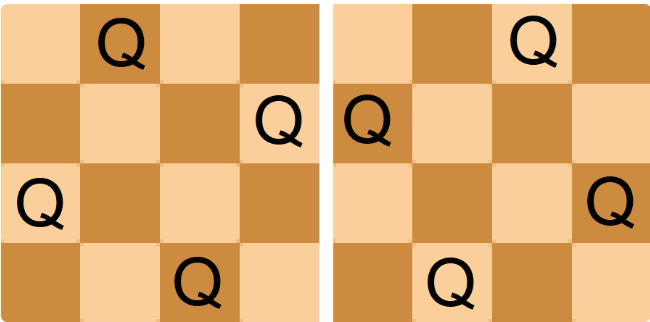
```
Sample Input 1:
4
Sample Output 1:
0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0
0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0
Explanation For Sample Input 1:
Output depicts two possible configurations of the chessboard for 4 queens.

The Chessboard matrix for the first configuration looks as follows:-

0 0 1 0
1 0 0 0
0 0 0 1
0 1 0 0

Queen contained cell is depicted by 1. As seen, No queen is in the same row, column, or diagonal as the other queens. Hence this is a valid configuration.
```

```
Place first Queen in each cell in the first row.
For each queen placed in a cell in the first row, place a queen in valid cells in consecutive rows.
If a valid cell does not exist in any row, backtrack and place the queen in consecutive rows in the previous rows
```

In [ ]:
from typing import List

class Solution:
    def solve(self, col, board, ans, leftrow, upperDiagonal, lowerDiagonal, n):
        if col == n:
            ans.append(board[:])
            return


        for row in range(n):
            if leftrow[row] == 0 and lowerDiagonal[row+col] == 0 and upperDiagonal[n-1+col-row] == 0:
                board[row] = board[row][:col] + '1' + board[row][col+1:]
                leftrow[row] = 1
                lowerDiagonal[row+col] = 1
                upperDiagonal[n-1+col-row] = 1
                self.solve(col+1, board, ans, leftrow,
                           upperDiagonal, lowerDiagonal, n)
                board[row] = board[row][:col] + '0' + board[row][col+1:]
                leftrow[row] = 0
                lowerDiagonal[row+col] = 0
                upperDiagonal[n-1+col-row] = 0


    def solveNQueens(self, n: int) -> List[List[str]]:
        ans = []
        board = ['0'*n for _ in range(n)]
        leftrow = [0]*n
        upperDiagonal = [0]*(2*n-1)
        lowerDiagonal = [0]*(2*n-1)
        self.solve(0, board, ans, leftrow, upperDiagonal, lowerDiagonal, n)
        return ans


obj = Solution()

def solveNQueens(n):
  ans = obj.solveNQueens(n)[::-1]
  for kek in ans:
    bruh = len(kek)
    for i in range(bruh):
      if i != bruh-1:
        print(*kek[i], end = " ")
      else:
        print(*kek[i])
  return ""

0 0 1 01 0 0 00 0 0 10 1 0 0
0 1 0 00 0 0 11 0 0 00 0 1 0


# Assignment

## Reach the destination

```
Given a source point (sx, sy) and a destination point (dx, dy), the task is to check if it is possible to reach the destination point using the following valid moves:

(a, b) -> (a + b, b)
(a, b) -> (a, a + b)
Your task is to find if it is possible to reach the destination point using only the desired moves or not.

For example:
For the coordinates, source point = (1, 1) and destination point = (3, 5)
The output will be true as the destination point can be reached using the following sequence of moves:
(1, 1) -> (1, 2) -> (3, 2) -> (3, 5)
Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line of input contains an integer ‘T’ representing the number of test cases. Then the test cases follow.

The only line of each test case contains four space-separated integers sx, sy, dx, and dy where sx, sy represents the coordinates of the source point and dx, dy represents the coordinates of the destination point.
Output Format:
For each test case, return the boolean true if the destination point can be reached from the source point using only the desired moves, else return false.

The output for each test case is to be printed on a separate line.
Note:
You do not need to print anything; it has already been taken care of. Just implement the given function.
Constraints:
1 <= T <= 100
1 <= x, y <= 3000

Where ‘T’ is the number of test cases and ‘x’, ‘y’ are the coordinates of the given points.

Time Limit: 1sec
Sample Input 1:
2
1 1 3 5
1 1 1 4
Sample Output 1:
True
True
Explanation For Sample Input 1:
For the first test case
The output will be true as destination point can be reached using the following sequence of moves:
(1, 1) -> (1, 2) -> (3, 2) -> (3, 5)

For the second test case
The output will be true as destination point can be reached using the following sequence of moves:
(1, 1) -> (1, 2) -> (1, 3) -> (1, 4)
Sample Input 2:
2
1 1 2 2
1 1 1 1
Sample Output 2:
False
True
```



```
Function  - f(x,y)

End/Base Case:
  (x,y) == (dx, dy)
  or
  (x > dx) or (y > dy)

At any point (x,y):
  if valid do:
    f(x+y, y)
    and
    f(x, x+y)
```



### 9/11 Test Cases Passed

In [ ]:
class Helper:
  def __init__(self):
    self.sx = 0
    self.sy = 0
    self.dx = 0
    self.dy = 0
    self.reached = False

h = Helper()

def traversal(x, y):
  if h.reached == False:
    #base/end cases
    if (x,y) == (h.dx, h.dy):
      h.reached = True
      return
    if (x > h.dx) or (y > h.dy):
      return

    #at any point (x,y)
    #option 1
    traversal(x + y, y)
    traversal(x, x + y)

def reachDestination(sx,sy,dx,dy):

  h.sx = sx
  h.sy = sy
  h.dx = dx
  h.dy = dy
  h.reached = False

  traversal(h.sx, h.sy)

  return h.reached

### All test cases passed - starts from (dx, dy) instead of (sx, sy). Supposed to be linear time complexity

In [ ]:
def reachDestination(sx,sy,dx,dy):


    #Destination reached
    if sx == dx and sy == dy:
        return True

    #Base case
    if sx > dx or sy > dy:
        return False


    #Recursive call
    if dx > dy:
        return reachDestination(sx,sy,dx - dy,dy)

    else:
        return reachDestination(sx,sy,dx,dy - dx)

## Ninja and his Dessert

```
Problem statement
Ninja is planning to make dessert. For which he is going to buy ingredients. There are ‘N’ base flavors and ‘M’ toppings. Ninja has a target that he will be needing an amount of ‘K’ for making the dessert.

For making dessert, there are some basic rules

1. There should be exactly one base flavor.
2. Toppings can be one or more or none.
3. There are at most two toppings of each type.
Ninja wants to make a dessert with a total cost as close to the target price as possible.

You will be given an array/list flavor of size N representing the cost of each base flavor and another array/list toppings of size 'M' representing the cost of each topping and the target price.

Your task is to help Ninja to find the closest possible cost of the dessert to the target price 'K'. If there are multiple answers, return the lower one.

Example

Let N = 2 , M = 2 , K = 10, FLAVOR = [1,7] , TOPPING = [3, 4] , K = 10

Here we can make a dessert with the base flavor of price 7 and adding 1 topping of price 3. Which will cost 7 + 3 = 10, which is exactly equal to k, so the closest possible price would be 10.
Detailed explanation ( Input/output format, Notes, Images )
Input Format
The first line of input contains an integer ‘T’ denoting the number of test cases to run. Then the test case follows.

The first line of each test case contains an integer ‘N’ representing the number of base FALVOURS.

The second line of each test case contains ‘N’ integer representing the cost base FLAVOURS.

The third line of each test case contains an integer ‘M’ representing the number of TOPPINGS.

The second line of each test case contains ‘M’ integer representing the cost TOPPINGS.

The fifth and last line of each test case contains an integer ‘K’ representing the target price for dessert.
Output Format
For each test case, print a single line containing a single integer denoting the closest possible price of the dessert to the target price.

The output of each test case will be printed in a separate line.
Note:

You don’t need to print anything or take input. It already has been taken care of. Just implement the function.
Constraints
1 <= T <= 5
1 <= N, M <= 10
1 <= FLAVOUR[i] , TOPPINGS[i] <= 10 ^ 4
1 <= K <= 10 ^ 4

Time limit: 1 sec.
```

In [ ]:
def closestCost(n, m, baseCosts, toppingCosts, target):

   best_cost = baseCosts[0]

   for b in range(len(baseCosts)):
      bitmask = [0] * len(toppingCosts)
      while True:
         current_price = baseCosts[b]
         for j in range(len(bitmask)):
            current_price += bitmask[j] * toppingCosts[j]
         if current_price - target == 0:
            return target
         elif abs(current_price - target) < abs(best_cost - target):
            best_cost = current_price
         elif abs(current_price - target) == abs(best_cost - target):
            if current_price < best_cost:
               best_cost = current_price

         if 0 not in bitmask and 1 not in bitmask:
            break
         for i in range(len(bitmask)):
            if bitmask[i] != 2:
               bitmask[i] += 1
               break
            else:
               bitmask[i] = 0
   return best_cost

## Combination Sum

```
Problem statement
You are given an array 'ARR' of 'N' distinct positive integers. You are also given a non-negative integer 'B'.



Your task is to return all unique combinations in the array whose sum equals 'B'. A number can be chosen any number of times from the array 'ARR'.



Elements in each combination must be in non-decreasing order.



For example:
Let the array 'ARR' be [1, 2, 3] and 'B' = 5. Then all possible valid combinations are-

(1, 1, 1, 1, 1)
(1, 1, 1, 2)
(1, 1, 3)
(1, 2, 2)
(2, 3)
Detailed explanation ( Input/output format, Notes, Images )
Input Format
Then the first line contains two space-separated integers, 'N' and 'B', denoting the number of elements in the array and the target sum, respectively.
The second line of each test case contains 'N' space-separated integers representing the elements of the array 'ARR'.
Output Format :
The only line will contain 'Yes', if the answer is correct. Else, it will contain 'No'.
Note:

You do not need to print anything; it has already been taken care of. Just implement the given function.
Sample Input 1 :
3 8
2 3 5
Sample Output 1:
Yes
Explanation Of Sample Input 1 :
All possible valid combinations are:
2 2 2 2
2 3 3
3 5
Sample Input 2 :
3 5
1 2 3
Sample Output 2:
Yes
Constraints:
1 <= 'N' <= 15
1 <= 'B' <= 20
1 <= 'ARR[i]' <= 20

Time Limit: 1sec
```

In [ ]:
'''
    Time Complexity: O(2^N)
    Space Complexity: O(N*2^N)

    where N is the total number of elements in the aray.
'''


from copy import copy

def solve(result, currIndex, currSum, currList, B, ARR):

    if currSum == B:
        result.append(copy(currList))
        return

    if currIndex == len(ARR):
        return

    solve(result, currIndex + 1, currSum, currList, B, ARR)


    count = 0

    while currSum <= B:

        count += 1

        currSum += ARR[currIndex]

        currList.append(ARR[currIndex])

        solve(result, currIndex + 1, currSum, currList, B, ARR)


    ''' We remove ARR[currIndex] from currList, 'count'
       number of times for backtracking '''
    while count:
        currList.pop()
        count -= 1


def combSum(ARR, B):

    ARR.sort()

    result = []
    currList = []

    solve(result, 0, 0, currList, B, ARR)

    return result

## Palindrome Partitioning

```
You are given a string 'S'. Your task is to partition 'S' such that every substring of the partition is a palindrome. You need to return all possible palindrome partitioning of 'S'.

Note: A substring is a contiguous segment of a string.

For Example:
For a given string “BaaB”
3 possible palindrome partitioning of the given string are:
{“B”, “a”, “a”, “B”}
{“B”, “aa”, “B”}
{“BaaB”}
Every substring of all the above partitions of “BaaB” is a palindrome.
Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The only line of input contains a string 'S'.
Output Format :
For each test case, print all the possible palindromic partitions of the given string in a separate line.

Each substring of a partition is written within quotes(““) and separated by comma(,) and space, and each partition of the given string is written inside square brackets[].

The output of each test case will be printed in a separate line.
Note:
All the substrings of a partition are sorted in lexicographical order in the output. You just need to return the partitions in any order.

You do not need to print or sort anything, it has already been taken care of. Just implement the function.
Constraints :
0 <= |S|<= 15
where |S| denotes the length of string 'S'.

Time Limit: 1 sec.
Sample Input 1:
aaC
Sample Output 1:
["C", "a", "a"]
["C", "aa"]
Explanation for input 1:
For the given string "aaC" there are two partitions in which all substring of partition is a palindrome.
Sample Input 2:
BaaB
Sample Output 2:
["B", "B", "a", "a"]
["B", "B", "aa"]
["BaaB"]
Explanation for input 2:
For the given string "BaaB", there are 3 partitions that can be made in which every substring is palindromic substrings.
```

In [ ]:
from sys import stdin
import json

def is_palindrome(s):
    return s == s[::-1]

def backtrack(start, s, current_partition, result):
    if start == len(s):
        result.append(current_partition[:])
        return

    for end in range(start + 1, len(s) + 1):
        substring = s[start:end]
        if is_palindrome(substring):
            current_partition.append(substring)
            backtrack(end, s, current_partition, result)
            current_partition.pop()

def partition(s):
    result = []
    backtrack(0, s, [], result)
    return result

s=stdin.readline().rstrip()

final=partition(s)

for ele in final:
    ele = sorted(ele)
    print(json.dumps(ele))

## Valid Sudoku

```
You have been given a 9 X 9 2D matrix 'MATRIX' with some cells filled with digits(1 - 9), and some empty cells (denoted by 0).

You need to find whether there exists a way to fill all the empty cells with some digit(1 - 9) such that the final matrix is a valid Sudoku solution.

A Sudoku solution must satisfy all the following conditions-

1. Each of the digits 1 - 9 must occur exactly once in each row.
2. Each of the digits 1 - 9 must occur exactly once in each column.
3. Each of the digits 1 - 9 must occur exactly once in each of the 9, 3 x 3 sub-matrices of the matrix.
Note
1. There will always be a cell in the matrix which is empty.
2. The given initial matrix will always be consistent according to the rules mentioned in the problem statement.
Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line contains a single integer 'T' denoting the number of test cases.
Then 'T' test cases follow.

Every test case contains 9 lines, with each line containing 9 single space-separated digits (0, if the cell is empty or a digit (1 - 9) otherwise).
Output Format:
For each test case, print a single line containing “yes”(without quotes), if there exists a Sudoku solution or “no” (without quotes) otherwise. Note the lowercase format of the output.
Note:
You do not need to print anything, it has already been taken care of. Just implement the given function.
Constraints:
1 <= 'T' <= 5
N = 9
0 <= MATRIX[i][j] <= 9

Where 'N' denotes the size of the given square matrix.

Time Limit: 1sec
Sample Input 1:
1
9 0 0 0 2 0 7 5 0
6 0 0 0 5 0 0 4 0
0 2 0 4 0 0 0 1 0
2 0 8 0 0 0 0 0 0
0 7 0 5 0 9 0 6 0
0 0 0 0 0 0 4 0 1
0 1 0 0 0 5 0 8 0
0 9 0 0 7 0 0 0 4
0 8 2 0 4 0 0 0 6
Sample Output 1:
yes
Explanation of the Sample Input1:
One of the possible solutions is:
9 4 1 3 2 6 7 5 8
6 3 7 1 5 8 2 4 9
8 2 5 4 9 7 6 1 3
2 6 8 7 1 4 3 9 5
1 7 4 5 3 9 8 6 2
3 5 9 6 8 2 4 7 1
4 1 3 2 6 5 9 8 7
5 9 6 8 7 3 1 2 4
7 8 2 9 4 1 5 3 6
Sample Input 2:
1
1 5 9 0 0 6 0 3 2
2 7 4 0 0 0 0 0 0
3 8 6 2 0 0 0 0 5
4 9 2 5 0 1 0 8 0
6 3 7 0 4 0 0 0 0
5 1 0 8 2 0 0 0 0
8 2 1 0 0 0 0 0 0
7 6 0 1 0 0 4 2 0
9 4 3 0 7 0 0 6 1
Sample Output 2:
no
Explanation of the Sample Input2:
In the third column from the left, there are two empty cells out of which one has to be filled with ‘8’, but we can’t put 8 in any of those two cells.
```

In [ ]:
def is_valid(board, row, col, num):
    # Check row
    for c in range(9):
        if board[row][c] == num:
            return False
    # Check column
    for r in range(9):
        if board[r][col] == num:
            return False
    # Check 3x3 subgrid
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for r in range(start_row, start_row + 3):
        for c in range(start_col, start_col + 3):
            if board[r][c] == num:
                return False
    return True

def solve_sudoku(board):
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:
                for num in range(1, 10):
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0
                return False
    return True

def isItSudoku(matrix):
    return solve_sudoku(matrix)

## Rat in a Maze - All Paths

```
You are given a 'N' * 'N' maze with a rat placed at 'MAZE[0][0]'. Find and print all paths that rat can follow to reach its destination i.e. 'MAZE['N' - 1]['N' - 1]'. Rat can move in any direc­tion ( left, right, up and down).

Value of every cell in the 'MAZE' can either be 0 or 1. Cells with value 0 are blocked means the rat can­not enter into those cells and those with value 1 are open.

Detailed explanation ( Input/output format, Notes, Images )
Input Format:
The first line of input contains an integer 'N' representing the dimension of the maze.

The next 'N' lines of input contain 'N' space-separated integers representing the type of the cell.
Output Format :
For each test case, return the path from the start position to the destination position and only cells that are part of the solution path should be 1, rest all cells should be 0.

Output for every test case will be printed in a separate line.
Note:
You do not need to print anything, it has already been taken care of. Just implement the given function.
Constraints:
1 <= N <= 10
0 <= MAZE[i][j] <=1

Where 'MAZE[i][j]' denotes the value in the cell of 'MAZE'.

Time Limit: 1 sec
Sample Input 1 :
3
1 0 1
1 0 1
1 1 1
Sample Output 1 :
1 0 0 1 0 0 1 1 1
Explanation for Sample Output 1:
Only 1 path is possible which contains coordinate < (1,1), (2,1), (3,1), (3,2) and (3,3) >

So our path matrix will look like this:

1 0 0
1 0 0
1 1 1

Which is returned from left to right and then top to bottom in one line.
Sample Input 2 :
2
1 0
0 1
Sample Output 2 :
 [Blank]
Explanation for Sample Output 2:
As no path is possible to the last cell, a blank vector will be returned and nothing is printed.
```

In [ ]:
def is_valid_move(x, y, maze, visited):
    return 0 <= x < len(maze) and 0 <= y < len(maze) and maze[x][y] == 1 and not visited[x][y]

def find_paths(maze, x, y, visited, path, all_paths):
    # If destination is reached, save the path
    if x == len(maze) - 1 and y == len(maze) - 1:
        all_paths.append([row[:] for row in path])
        return

    # Define possible moves (down, up, right, left)
    moves = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    for move in moves:
        next_x, next_y = x + move[0], y + move[1]
        if is_valid_move(next_x, next_y, maze, visited):
            visited[next_x][next_y] = True
            path[next_x][next_y] = 1
            find_paths(maze, next_x, next_y, visited, path, all_paths)
            # Backtrack
            path[next_x][next_y] = 0
            visited[next_x][next_y] = False

def ratInAMaze(maze, n):
    # Initialize visited matrix and path matrix
    visited = [[False for _ in range(n)] for _ in range(n)]
    path = [[0 for _ in range(n)] for _ in range(n)]

    all_paths = []
    if maze[0][0] == 1:  # Starting point must be open
        visited[0][0] = True
        path[0][0] = 1
        find_paths(maze, 0, 0, visited, path, all_paths)

    return all_paths

# Example usage
def print_paths(all_paths):
    for path in all_paths:
        for row in path:
            print(*row, end = " ")
        print()

# Main.
n = int(input())
maze = n*[0]

for i in range(0 , n):
    maze[i]=input().split()
    maze[i]=[int(j) for j in maze[i]]

all_paths = ratInAMaze(maze, n)
print_paths(all_paths)